# CS295B F18: Homework 2
## The Laplace Mechanism

## Instructions

This assignment has two parts. The first part contains questions about the Laplace mechanism and composition in differential privacy. The second part asks you to apply the Laplace mechanism in several ways to obtain differentially private answers to queries over the `adult` dataset from Homework 1, and examines the accuracy of these answers.

Before you start, download the example dataset and ensure that all cells in this notebook execute without error. If you have trouble getting the notebook to run, please post a question on Piazza.

To ensure that the notebook runs, I've defined a function `your_code_here()` that simply returns the number `1`. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to `your_code_here()` in place or insert dummy values so that the cell does not throw an error when it runs.

Many of the questions in this assignment ask you to construct graphs. To help you arrive at the correct solution, I have left the graph plotted by my sample solution in the uploaded version of this notebook. You can refer to these example graphs by viewing the notebook on Github. If you re-run the cell after downloading the notebook, the graphs will disappear (because the notebook no longer contains the code that generated them). Your solutions should produce graphs similar to the ones in the uploaded notebook.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.

The point value of each question is listed with the question, and these add up to 100 points. The assignment is due by 11:59pm on Monday, September 24. When you have finished your assignment, submit it via Blackboard under the assignment "Homework 2." For questions on grading and submitting assignments, refer to the course webpage or email the instructor.

# BEGIN PREAMBLE ------------------------------------

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

def your_code_here():
    return 1

# END PREAMBLE -------------------------------------

## Collaboration Statement

In the cell below, write your collaboration statement. This statement should describe all collaborations, even high-level ones (e.g. "I discussed my general approach for answering question 3 with Josh"). High-level collaborations of this kind are allowed as long as they are described; copying of answers or code is not allowed.

In [2]:
# In this cell (in markdown or a comment) write your collaboration statement

# Part 1: Laplace Mechanism & Composition

### Question 1 (10 points)
Define a function `laplace_mech` that implements the Laplace Mechanism for a query result consisting of a single real number. Your implementation should work for queries of any sensitivity (by passing sensitivity as an argument) and any value of `epsilon`.

*Hint*: use `np.random.laplace`.

In [21]:
def laplace_mech(query, sensitivity, epsilon):
    return your_code_here()

In [4]:
laplace_mech(48273, 1, 1)

48273.62614440791

### Question 2 (10 points)
Graph the *empirical probability density function* of the Laplace Mechanism, for a counting query whose answer is `200.0`, at `epsilon` values of `10`, `1`, and `.5`. 

The *empirical probability density function* is the probability density of samples drawn from an underlying distribution. To graph this function for the Laplace Mechanism, draw 10,000 samples from the output distribution of your mechanism, and then graph the frequency of each output value (using a histogram).

*Hint*: use `plt.hist(..., bins=50)` three times to produce the three histograms, one on top of the other.

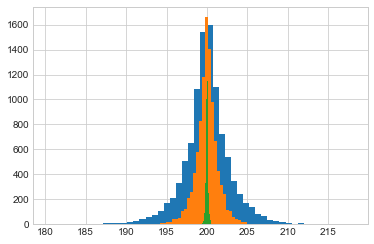

In [5]:
your_code_here()
None

### Question 3 (5 points)
In 2-5 sentences, answer the following:
- What do you observe about the emprical PDF of the Laplace Mechanism when `epsilon` changes?
- What effect does this observation have on privacy?

In [ ]:
# Write your answer to Question 3 here

### Question 4 (5 points)

Graph the empirical PDFs for your Laplace Mechanism running the same query on two hypothetical neighboring databases. Imagine that on one database, the query's true answer (i.e. with no noise added) is 200, while on its neighbor, the answer is 201. Use 10,000 samples to build the empirical PDF.

*Hint*: use `plt.hist(..., bins=50)` twice.

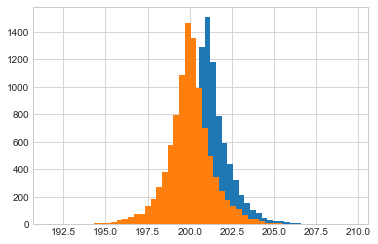

In [16]:
your_code_here()
None

### Question 5 (5 points)

In 2-5 sentences, answer the following:
- What do you observe about the way the two empirical PDFs overlap?
- What effect does the overlap have on privacy?

In [ ]:
# Write your answer to Question 5 here

### Question 6 (10 points)

Consider the definition of `mech2` below. Graph the empirical PDF of `mech2` for 10,000 samples and three values of `epsilon`: 10, 1, and 0.5.

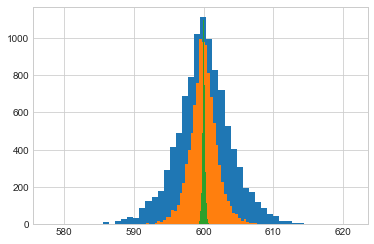

In [7]:
def mech2(epsilon):
    val1 = laplace_mech(200, 1, epsilon)
    val2 = laplace_mech(400, 1, epsilon)
    return val1 + val2

your_code_here()
None

### Question 7 (5 points)

In 3-6 sentences, answer the following:
- What is the privacy cost of `mech2`?
- Informally, why is this privacy cost correct?
- Is the shape of `mech2`'s empirical PDF similar to that of `laplace_mech`'s empirical PDF? What does this similarity or lack of similarity mean for privacy?

In [ ]:
# Write your answer to Question 7 here

### Question 8 (10 points)

Implement a mechanism `mech_n` that returns the average of `n` differentially private results for a single query.

*Hint*: use `laplace_mech` and `np.mean`.

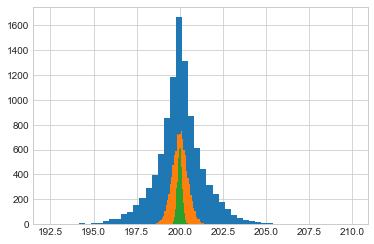

In [22]:
def mech_n(query, epsilon, n):
    return your_code_here()

vals1 = [mech_n(200, 1, 100) for v in range(10000)]
vals2 = [mech_n(200, 1, 10) for v in range(10000)]
vals3 = [mech_n(200, 1, 1) for v in range(10000)]
plt.hist(vals3, bins=50)
plt.hist(vals2, bins=50)
plt.hist(vals1, bins=50)
None

### Question 9 (5 points)

In 2-5 sentences, answer the following:
- What is the privacy cost of `mech_n`?
- Informally, why is this privacy cost correct?

In [ ]:
# Write your answer to Question 9 here

# Part 2: Analyzing Real Data

Next we'll examine the effect of differential privacy on some queries over the `adult` dataset that we used for Homework 1. First, we'll read in the data.

In [9]:
adult_data = pd.read_csv("adult_with_pii.csv")
adult_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Question 10 (10 points)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult_data` dataframe to contain only participants who were never married, then return the 0th element of the `shape` of the filtered dataframe.

*Hint*: if you have not used Pandas before, [this](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) comparison with SQL might be useful.

In [10]:
query1 = your_code_here()
query1

10683

### Question 11 (5 points)

In 2-5 sentences, answer the following:
- What is the sensitivity of the query in question 10, and why?

In [ ]:
# Write your answer to Question 11 here

### Question 12 (10 points)

Use your implementation of `laplace_mech` to produce a differentially private answer to your query from the last question, with `epsilon = 0.1`.

In [11]:
your_code_here()

10683.322660193706

### Question 13 (10 points)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Using your answer to question 12, write code to produce 1000 differentially private answers to the marital status query from question 10, with `epsilon = 0.1`. Calculate the percent error for each one of these answers against the original (non-private) answer. Then, graph the distribution of errors using a histogram.

*Hint*: use `plt.hist(..., bins=20)`.

In [12]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

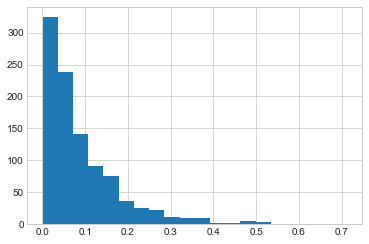

In [13]:
your_code_here()
None